In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller




df = pd.read_csv('train.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

# Question 1a - Parse time and set as index
print("First 5 rows of the dataset:\n", df.head())

First 5 rows of the dataset:
                  price         v1         v2
time                                        
2000-01-01  100.993428  84.499453  54.198066
2000-01-02  101.076804  88.917499  54.249283
2000-01-03  103.982276  78.425394  53.066048
2000-01-04  107.027305  89.117171  52.233686
2000-01-05  104.749230  82.841147  57.376684


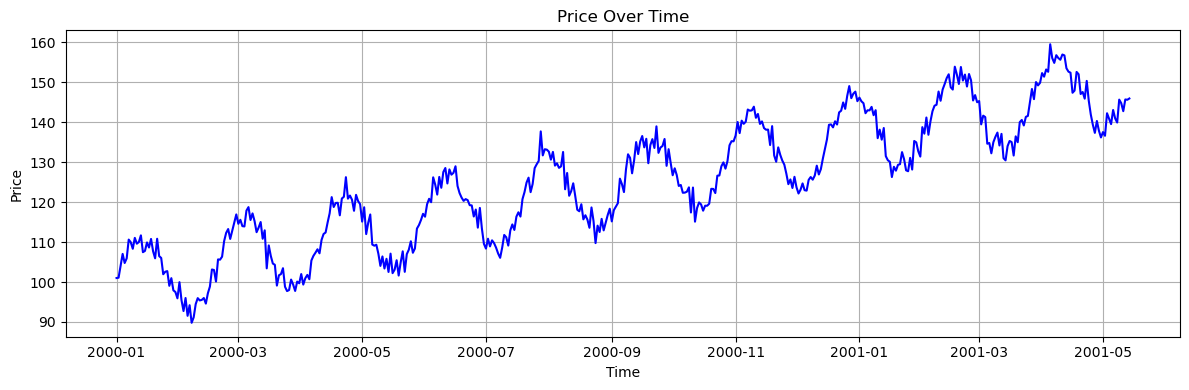

In [3]:
# Question 1B

plt.figure(figsize=(12, 4))
plt.plot(df.index, df['price'], color='blue')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

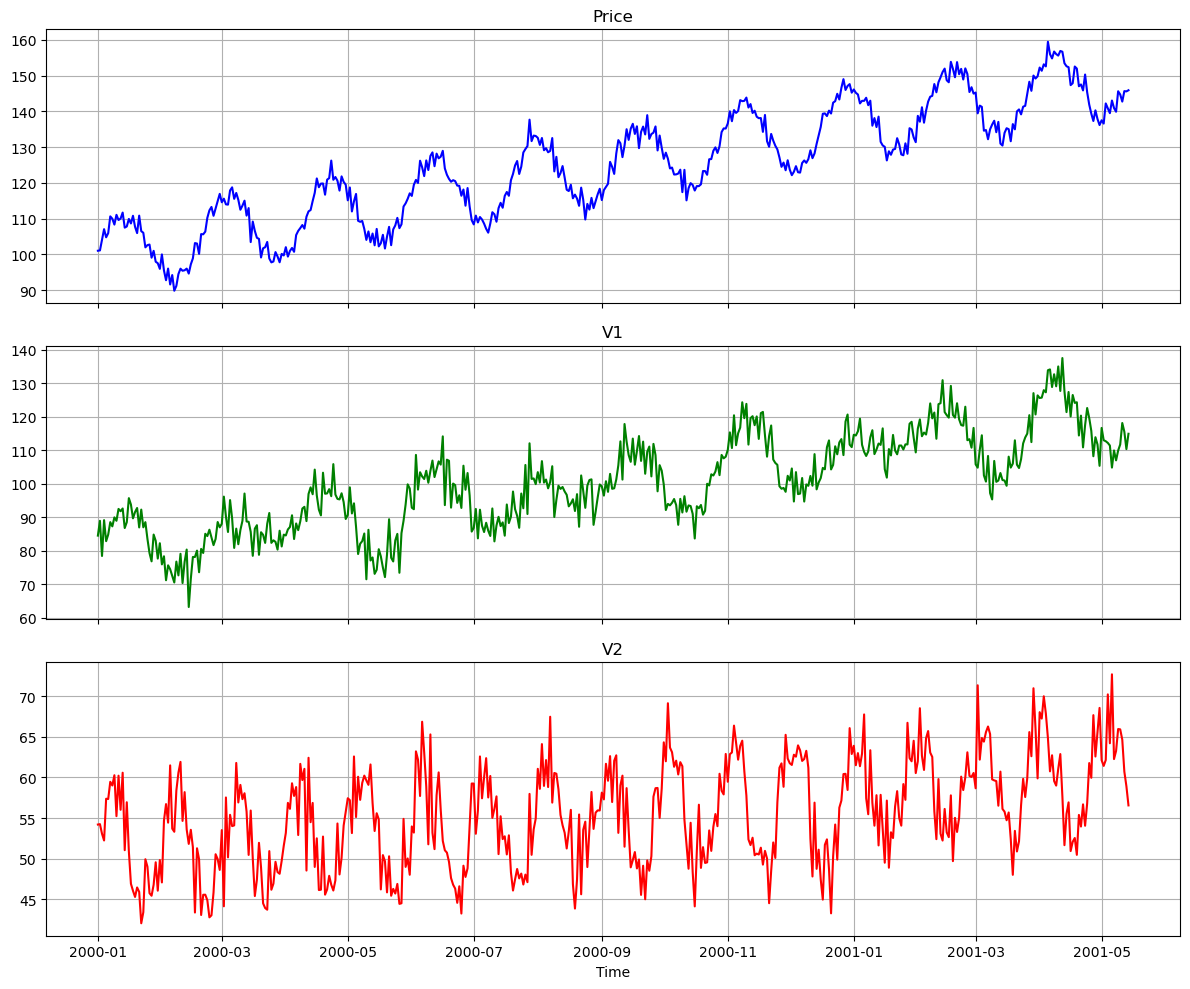

In [9]:
# Question 1c - Subplot of price, v1, v2
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
axes[0].plot(df.index, df['price'], label='Price', color='blue')
axes[1].plot(df.index, df['v1'], label='V1', color='green')
axes[2].plot(df.index, df['v2'], label='V2', color='red')

axes[0].set_title('Price')
axes[1].set_title('V1')
axes[2].set_title('V2')
for ax in axes:
    ax.grid(True)
plt.xlabel('Time')
plt.tight_layout()
plt.show()

Comment: V1 shows a clear upward trend over time, while V2 exhibits strong cyclical patterns. This suggests V1 may be linked to a growing factor, whereas V2 might reflect a seasonal or periodic influence on the system.

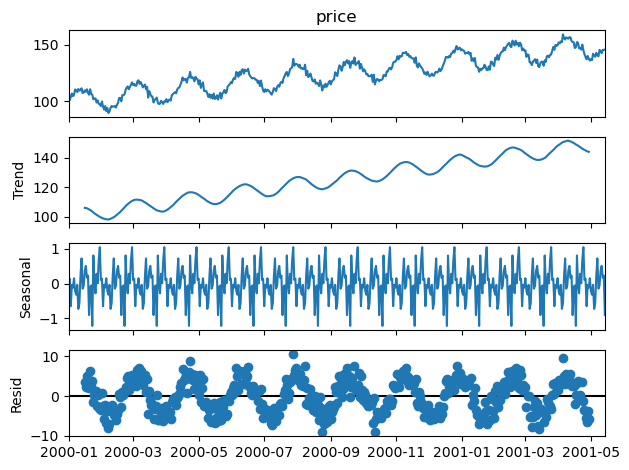

In [11]:
# Question 2a - Time Series Decomposition
result = seasonal_decompose(df['price'], model='additive', period=30)
result.plot()
plt.tight_layout()
plt.show()


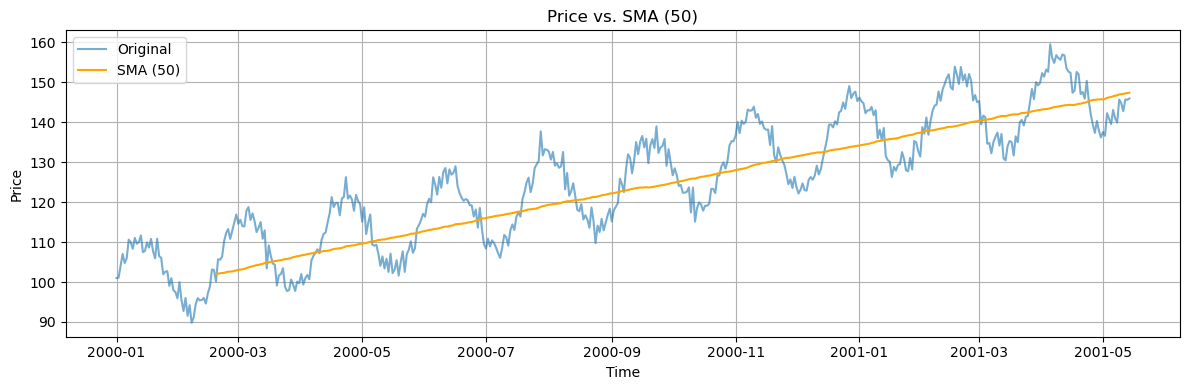

In [12]:
# Question 2b - Simple Moving Average
df['SMA_50'] = df['price'].rolling(window=50).mean()

plt.figure(figsize=(12, 4))
plt.plot(df['price'], label='Original', alpha=0.6)
plt.plot(df['SMA_50'], label='SMA (50)', color='orange')
plt.title('Price vs. SMA (50)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

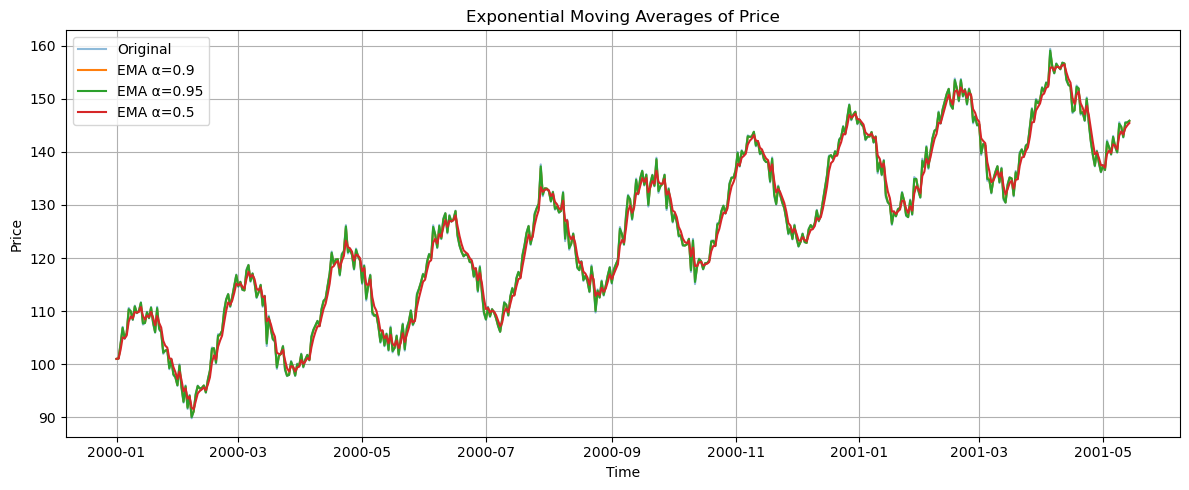

In [13]:
# Question 2c - Exponential Moving Average
df['EMA_0.9'] = df['price'].ewm(alpha=0.9).mean()
df['EMA_0.95'] = df['price'].ewm(alpha=0.95).mean()
df['EMA_0.5'] = df['price'].ewm(alpha=0.5).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['price'], label='Original', alpha=0.5)
plt.plot(df['EMA_0.9'], label='EMA α=0.9')
plt.plot(df['EMA_0.95'], label='EMA α=0.95')
plt.plot(df['EMA_0.5'], label='EMA α=0.5')
plt.title('Exponential Moving Averages of Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Bonus Question 3a - ADF Test for Stationarity
adf_result = adfuller(df['price'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")

if adf_result[1] < 0.05:
    print("Conclusion: The time series is stationary.")
else:
    print("Conclusion: The time series is not stationary.")

ADF Statistic: -1.5185824406089201
p-value: 0.5242996646487532
Critical Values:
	1%: -3.4440184853599876
	5%: -2.867567599912013
	10%: -2.5699804779975883
Conclusion: The time series is not stationary.


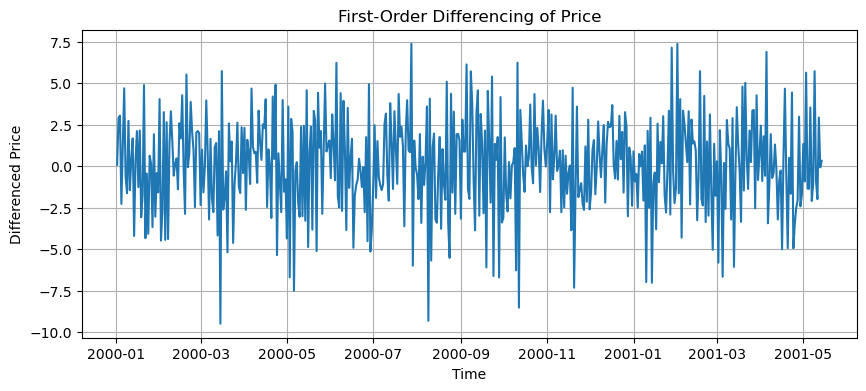

In [15]:
# Bonues 3B

# First-order differencing
price_diff = df['price'].diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(price_diff)
plt.title('First-Order Differencing of Price')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.grid(True)
plt.show()

In [16]:
# Question 3C


# ADF test on differenced series
adf_result_diff = adfuller(price_diff)

print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"   {key}: {value}")

ADF Statistic (Differenced): -8.298957129833068
p-value: 4.067296388653465e-13
Critical Values:
   1%: -3.4440471158221206
   5%: -2.867580197120949
   10%: -2.5699871918402777


### Graph Representation

In [17]:
import heapq

# Define the graph
graph = {
    'ORD': {'SFO': 1843, 'LGA': 733, 'PVD': 849, 'DFW': 802, 'LAX': 1743},
    'SFO': {'ORD': 1843, 'LAX': 337},
    'LAX': {'SFO': 337, 'ORD': 1743, 'DFW': 1233, 'HNL': 2555},
    'HNL': {'LAX': 2555},
    'DFW': {'ORD': 802, 'LAX': 1233, 'MIA': 1120, 'LGA': 1387},
    'MIA': {'DFW': 1120, 'LGA': 1099, 'PVD': 1205},
    'PVD': {'ORD': 849, 'MIA': 1205},
    'LGA': {'ORD': 733, 'DFW': 1387, 'MIA': 1099, 'PVD': 142}
}

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

shortest_paths = dijkstra(graph, 'ORD')

# Display results
print("Shortest distances from ORD:")
for dest, dist in shortest_paths.items():
    print(f"{dest}: {dist} miles")


Shortest distances from ORD:
ORD: 0 miles
SFO: 1843 miles
LAX: 1743 miles
HNL: 4298 miles
DFW: 802 miles
MIA: 1832 miles
PVD: 849 miles
LGA: 733 miles


In [18]:
def prim(graph, start):
    visited = set()
    min_heap = [(0, start)]
    mst_weight = 0
    mst_edges = []

    while min_heap and len(visited) < len(graph):
        weight, node = heapq.heappop(min_heap)

        if node not in visited:
            visited.add(node)
            mst_weight += weight

            if weight != 0:
                mst_edges.append(weight)

            for neighbor, edge_weight in graph[node].items():
                if neighbor not in visited:
                    heapq.heappush(min_heap, (edge_weight, neighbor))

    return mst_edges, mst_weight

prim_edges, prim_total = prim(graph, 'ORD')
print("Prim’s MST Weights:", prim_edges)
print("Total MST Weight (Prim):", prim_total)

Prim’s MST Weights: [733, 142, 802, 1099, 1233, 337, 2555]
Total MST Weight (Prim): 6901


In [19]:
class DisjointSet:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        return self.parent[v]

    def union(self, v1, v2):
        root1, root2 = self.find(v1), self.find(v2)
        if root1 != root2:
            self.parent[root2] = root1
            return True
        return False

def kruskal(graph):
    edges = []
    for u in graph:
        for v, w in graph[u].items():
            if (v, u, w) not in edges:
                edges.append((u, v, w))

    edges.sort(key=lambda x: x[2])  # Sort by weight
    ds = DisjointSet(graph.keys())

    mst_weight = 0
    mst_edges = []

    for u, v, w in edges:
        if ds.union(u, v):
            mst_edges.append(w)
            mst_weight += w

    return mst_edges, mst_weight

kruskal_edges, kruskal_total = kruskal(graph)
print("\nKruskal’s MST Weights:", kruskal_edges)
print("Total MST Weight (Kruskal):", kruskal_total)


Kruskal’s MST Weights: [142, 337, 733, 802, 1099, 1233, 2555]
Total MST Weight (Kruskal): 6901
